<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [5]:
# Acá deberían leer el conjunto de datos que ya tienen. Este archivo esta en la carpeta del drive "PARTE 2".
#melb_ok = pd.read_csv('/content/sample_data/MELB_ok.csv')
melb_ok = pd.read_csv('/content/MELB_ok.csv') 
del melb_ok['Unnamed: 0']
melb_ok[:3]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname,cities,neighborhoods,daily_rental_price,review_scores_location
0,Other,2,h,1480000.0,2.5,3067.0,1.0,1.0,NaN,NaN,-37.7996,Yarra,144.9984,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
1,Other,2,h,1035000.0,2.5,3067.0,1.0,0.0,79.0,1900.0,-37.8079,Yarra,144.9934,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652
2,Other,3 a 5,h,1465000.0,2.5,3067.0,2.0,0.0,150.0,1900.0,-37.8093,Yarra,144.9944,Northern Metropolitan,"Boroondara, Yarra","Abbotsford, Kew, Richmond",127.63035,9.695652


In [6]:
melb_ok.shape

(13310, 18)

In [7]:
melb_ok.describe()

,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,Longtitude,daily_rental_price,review_scores_location
count,1.331000e+04,13310.000000,13310.000000,13310.000000,13248.000000,6968.000000,8019.000000,13310.000000,13310.000000,12769.000000,12769.000000
mean,1.052134e+06,10.176927,3105.203681,1.525995,1.607261,150.985933,1964.789999,-37.808914,144.995373,116.530258,9.488426
std,5.496591e+05,5.882653,91.090663,0.674365,0.955079,546.730044,37.276227,0.079586,0.104206,33.922789,0.283391
min,3.000000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.485710,49.967742,7.857143
25%,6.500000e+05,6.200000,3044.000000,1.000000,1.000000,94.000000,1940.000000,-37.856720,144.929320,92.000000,9.298246
50%,9.030000e+05,9.300000,3084.000000,1.000000,2.000000,126.000000,1970.000000,-37.801850,145.000100,113.763889,9.500000
75%,1.320000e+06,13.000000,3148.000000,2.000000,2.000000,172.000000,1999.000000,-37.755600,145.058800,136.173913,9.692308
max,3.335000e+06,48.100000,3977.000000,8.000000,10.000000,44515.000000,2018.000000,-37.408530,145.526350,268.904762,10.000000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `np.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pd.DataFrame.values` permite acceder a la matriz de np subyacente a un DataFrame.


  ### Opción 1: ONE-HOT-ENCODER
  Se realiza a continuación ONE-HOT-ENCODER del archivo extraido del ejercicio anterior

In [8]:
melb_cut=melb_ok.copy()

del melb_cut['YearBuilt']

del melb_cut['BuildingArea']

#Reemplazamos los NaN si es posible

melb_cut['Car'] = melb_cut['Car'].fillna(0)
melb_cut['review_scores_location'] = melb_cut['review_scores_location'].fillna(0)
melb_cut['daily_rental_price'] = melb_cut['daily_rental_price'].fillna(0)

# O eliminamos por el momento las columnas si no es posible reemplazar:

del melb_cut['CouncilArea']
del melb_cut['cities']
del melb_cut['neighborhoods']


#nuevo df to encode:

melb_to_encode=melb_cut.copy()

from sklearn.preprocessing import OneHotEncoder

#La intencion es encoding todas las columnas categoricas de una. 

#Para ello, distingo las columnas numericas de las categoricas y almacenamos en dos listas sus nombres.  

numeric_cols = melb_to_encode.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = melb_to_encode.select_dtypes(include=['object', 'category']).columns.to_list()

#Definimos el encoder y se lo pasamos solo a las columnas categoricas:

encoder = OneHotEncoder(sparse=False)

encoder.fit(melb_to_encode[cat_cols])

#Guardamos los nombres de estas nuevas columnas!

cat_cols_labels=encoder.get_feature_names(cat_cols)

#Armamos un nuevo df solo con las columnas numericas y reservamos 

numeric_cols_df=melb_to_encode[numeric_cols]

#Del encoding resulta un arreglo de np con tantos items como filas y cada item tiene en tantos valores 
#como valores posibles tenia la variable categorica: aparecen 1's donde coincide el tipo con el encoding y 0's donde no. 

encoded_list = encoder.transform(melb_to_encode[cat_cols]) #arreglo de np

#Armamos las etiquetas de las nuevas columnas
labels = np.concatenate([numeric_cols, cat_cols_labels])

#Unimos el df que armamos solo de variables numericas, las cuales no se modificaron, con el encoding nuevo: resulta un arreglo de np

onehot_melb=np.hstack((numeric_cols_df,encoded_list))

#Armamos un dataframe e indicamos el nombre de las columnas. 

#De cada categoria codificada, se van a desglosar tantas columnas como posibles valores de esa categoria.
#Por ej, la columna "Type" tenia 3 posibles valores, entonces, habrá 3 columnas correspondientes a Type, cada una asociada a un valor. 

onehot_melb=pd.DataFrame(onehot_melb,columns=labels)

onehot_melb[:1]

#Guardamos el df en un .csv

onehot_melb.to_csv('one_hot_encoding_matrix.csv')


In [9]:
#DF resultante de ONE-HOT ENCODER (13310 rows × 67 columns)

onehot_melb

,Price,Distance,Postcode,Bathroom,Car,Lattitude,Longtitude,daily_rental_price,review_scores_location,Suburb_Ascot Vale,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Other,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_Williamstown,Suburb_Yarraville,Rooms_1,Rooms_2,Rooms_3 a 5,Rooms_Más de 6,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,1480000.0,2.5,3067.0,1.0,1.0,-37.79960,144.99840,127.630350,9.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1035000.0,2.5,3067.0,1.0,0.0,-37.80790,144.99340,127.630350,9.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1465000.0,2.5,3067.0,2.0,0.0,-37.80930,144.99440,127.630350,9.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,850000.0,2.5,3067.0,2.0,1.0,-37.79690,144.99690,127.630350,9.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1600000.0,2.5,3067.0,1.0,2.0,-37.80720,144.99410,127.630350,9.695652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,1245000.0,16.7,3150.0,2.0,2.0,-37.90562,145.16761,125.278075,9.469697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13306,1031000.0,6.8,3016.0,2.0,2.0,-37.85927,144.87904,180.082192,9.717391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13307,1170000.0,6.8,3016.0,2.0,4.0,-37.85274,144.88738,180.082192,9.717391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13308,2500000.0,6.8,3016.0,1.0,5.0,-37.85908,144.89299,180.082192,9.717391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Obtuvimos así una matriz de 112 columnas con todas las columnas categoricas codificadas. 

#### Nuevo DataFrame con ONE-HOT-ENCODER

  ### Opción 2: DICTVECTORIZER
  Se realiza a continuación ONE-HOT-ENCODER del archivo extraido del ejercicio anterior

In [10]:
#Volvemos a trabajar con el df inicial

#A los "CouncilArea" que quedaron vacios los completamos con "Other"

melb_ok['CouncilArea'] = np.where(melb_ok['CouncilArea'].isna(),'Other',melb_ok['CouncilArea'])
melb_ok[melb_ok['CouncilArea'].isna()]

,Suburb,Rooms,Type,Price,Distance,Postcode,Bathroom,Car,BuildingArea,YearBuilt,Lattitude,CouncilArea,Longtitude,Regionname,cities,neighborhoods,daily_rental_price,review_scores_location


In [11]:
#Distinguimos las columnas numericas de las categoricas y almacenamos en dos listas sus nombres. Partimos del df donde eliminamos columnas con NaN's y demas. 

categorical_cols =  melb_to_encode.select_dtypes(include=['object', 'category']).columns.to_list()#['Rooms',Suburb', 'Type', 'Postcode', 'CouncilArea', 'Regionname']
numerical_cols = melb_to_encode.select_dtypes(include=['float64', 'int']).columns.to_list() #['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']

In [12]:
numeric_cols

['Price',
 'Distance',
 'Postcode',
 'Bathroom',
 'Car',
 'Lattitude',
 'Longtitude',
 'daily_rental_price',
 'review_scores_location']

In [13]:
melb_ok[categorical_cols].nunique()

Suburb        43
Rooms          4
Type           3
Regionname     8
dtype: int64

In [14]:
# Check for nulls
melb_ok[categorical_cols].isna().sum()

Suburb        0
Rooms         0
Type          0
Regionname    0
dtype: int64

In [15]:
#Transformamos el DF a un diccionario, pues así lo requiere la funcion DictVectorizer()
features_cols = categorical_cols + numerical_cols
feature_dict = list(melb_to_encode[features_cols].T.to_dict().values()) #version meli

feature_dict[:2]

[{'Bathroom': 1.0,
  'Car': 1.0,
  'Distance': 2.5,
  'Lattitude': -37.7996,
  'Longtitude': 144.9984,
  'Postcode': 3067.0,
  'Price': 1480000.0,
  'Regionname': 'Northern Metropolitan',
  'Rooms': '2',
  'Suburb': 'Other',
  'Type': 'h',
  'daily_rental_price': 127.63035019455252,
  'review_scores_location': 9.695652173913043},
 {'Bathroom': 1.0,
  'Car': 0.0,
  'Distance': 2.5,
  'Lattitude': -37.8079,
  'Longtitude': 144.9934,
  'Postcode': 3067.0,
  'Price': 1035000.0,
  'Regionname': 'Northern Metropolitan',
  'Rooms': '2',
  'Suburb': 'Other',
  'Type': 'h',
  'daily_rental_price': 127.63035019455252,
  'review_scores_location': 9.695652173913043}]

#### Aplicamos DictVectorizer()

In [16]:
#Aplicamos DictVectorizer()
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)
feature_matrix
# Contenido de un item transformado
feature_matrix.todense()[0]

matrix([[ 1.00000000e+00,  1.00000000e+00,  2.50000000e+00,
         -3.77996000e+01,  1.44998400e+02,  3.06700000e+03,
          1.48000000e+06,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+0

In [17]:
feature_matrix

<13310x67 sparse matrix of type '<class 'numpy.float64'>'
	with 173030 stored elements in Compressed Sparse Row format>

In [18]:
#Obtenemos los nombres de las nuevas columnas. Que ahora son 528!!! 
dict_cols=vec.get_feature_names()
dict_cols

['Bathroom',
 'Car',
 'Distance',
 'Lattitude',
 'Longtitude',
 'Postcode',
 'Price',
 'Regionname=Eastern Metropolitan',
 'Regionname=Eastern Victoria',
 'Regionname=Northern Metropolitan',
 'Regionname=Northern Victoria',
 'Regionname=South-Eastern Metropolitan',
 'Regionname=Southern Metropolitan',
 'Regionname=Western Metropolitan',
 'Regionname=Western Victoria',
 'Rooms=1',
 'Rooms=2',
 'Rooms=3 a 5',
 'Rooms=Más de 6',
 'Suburb=Ascot Vale',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bentleigh',
 'Suburb=Bentleigh East',
 'Suburb=Brighton',
 'Suburb=Brighton East',
 'Suburb=Brunswick',
 'Suburb=Brunswick West',
 'Suburb=Camberwell',
 'Suburb=Carnegie',
 'Suburb=Coburg',
 'Suburb=Doncaster',
 'Suburb=Elwood',
 'Suburb=Essendon',
 'Suburb=Fawkner',
 'Suburb=Footscray',
 'Suburb=Glen Iris',
 'Suburb=Glenroy',
 'Suburb=Hampton',
 'Suburb=Hawthorn',
 'Suburb=Hawthorn East',
 'Suburb=Keilor East',
 'Suburb=Kensington',
 'Suburb=Kew',
 'Suburb=Malvern East',
 'Suburb=Moonee Pond

#### Validación de memoria
Esto es para validar que nuestra matriz densa nos va a entrar en memoria solamente

In [19]:
# Fill nan values on sparse matrix.
if np.any(np.isnan(feature_matrix.data)):
  feature_matrix.data = np.nan_to_num(feature_matrix.data)

In [20]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 15
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb * 1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 3.40 MB
Final size: 3.40


In [21]:
dense_feature_matrix.shape[0], len(melb_ok)

(13310, 13310)

In [22]:
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] <= len(melb_ok):
  melb_ok_sample = melb_ok.iloc[:dense_feature_matrix.shape[0]]
  print('Todo ok con el tamaño de la matriz')
else:
  melb_ok_sample = melb_ok

Todo ok con el tamaño de la matriz


In [23]:
dict_melb=pd.DataFrame(dense_feature_matrix,columns=dict_cols)

#Guardamos el df en un .csv

dict_melb.to_csv('Dict_vectorizer_matrix.csv')

In [24]:
#Dataframe resultante de DICTVECTORIZER.

dict_melb[:2] 

#Lo comparamos con el df resultante del one-hot-encoder aplicado a todas las columnas categoricas. Deberiamos haber obtenido lo mismo. 
columns_A=dict_melb.columns
columns_B=onehot_melb.columns

import collections 
columns_A_sorted = sorted(columns_A)
columns_B_sorted = sorted(columns_B)

columns_A_replace = []

for string in columns_A_sorted:
    columns_A_replace_new = string.replace("=", "_")
    columns_A_replace.append(columns_A_replace_new)

print(columns_A_replace)
print(columns_B_sorted)
 
if collections.Counter(columns_A_replace) == collections.Counter(columns_B_sorted):
  print('Data set iguales')
else:
   print('Data set distintos')
## comparison_df=dict_melb[j].compare(onehot_melb[j],align_axis=1)

['Bathroom', 'Car', 'Distance', 'Lattitude', 'Longtitude', 'Postcode', 'Price', 'Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan', 'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan', 'Regionname_Western Victoria', 'Rooms_1', 'Rooms_2', 'Rooms_3 a 5', 'Rooms_Más de 6', 'Suburb_Ascot Vale', 'Suburb_Balwyn', 'Suburb_Balwyn North', 'Suburb_Bentleigh', 'Suburb_Bentleigh East', 'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Brunswick', 'Suburb_Brunswick West', 'Suburb_Camberwell', 'Suburb_Carnegie', 'Suburb_Coburg', 'Suburb_Doncaster', 'Suburb_Elwood', 'Suburb_Essendon', 'Suburb_Fawkner', 'Suburb_Footscray', 'Suburb_Glen Iris', 'Suburb_Glenroy', 'Suburb_Hampton', 'Suburb_Hawthorn', 'Suburb_Hawthorn East', 'Suburb_Keilor East', 'Suburb_Kensington', 'Suburb_Kew', 'Suburb_Malvern East', 'Suburb_Moonee Ponds', 'Suburb_Newport', 'Suburb_Northcote', 'Su

In [25]:
# Con la intencion de comparar ambos df's para ver si obtuvimos lo mismo con ambos metodos: 

#Primero, reemplazamos = por _ en el nombre de las columnas, asi quedan iguales! 
for i in dict_melb.columns:

       j=i.replace("=", "_")
       dict_melb=dict_melb.rename(columns={i:j})

#Luego, ordenamos las columnas iguales en ambos df's. 

order=dict_melb.columns

onehot_melb=onehot_melb[order]

#Finalmente, comparamos y vemos las diferencias:

dfs_differences=dict_melb.compare(onehot_melb,align_axis=1)

dfs_differences

# Observamos que las diferencias son en las ultimas cifras decimales de algunos numeros. Luego, ambos dataframes son iguales. 

Distance        Lattitude  ... daily_rental_price review_scores_location          
            self other       self  ...              other                   self     other
0            NaN   NaN -37.799599  ...         127.630350               9.695652  9.695652
1            NaN   NaN -37.807899  ...         127.630350               9.695652  9.695652
2            NaN   NaN -37.809299  ...         127.630350               9.695652  9.695652
3            NaN   NaN -37.796902  ...         127.630350               9.695652  9.695652
4            NaN   NaN -37.807201  ...         127.630350               9.695652  9.695652
...          ...   ...        ...  ...                ...                    ...       ...
13305  16.700001  16.7 -37.905621  ...         125.278075               9.469697  9.469697
13306   6.800000   6.8 -37.859268  ...         180.082192               9.717391  9.717391
13307   6.800000   6.8 -37.852741  ...         180.082192               9.717391  9.717391
13308   6.800000   6.8 -37.859081  ...         180.082192               9.717391  9.717391
13309   6.300000   6.3 -37.811878  ...         135.609756               9.485294  9.485294

[13310 rows x 10 columns]

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

### Imputación KNN 

In [26]:
#En este ejercicio imputaremos los valores faltantes en las columnas "YearBuilt" y "BuildingArea" empleando el metodo de KNN. 
#Basicamente, imputará los valores teniendo en cuenta "los vecinos mas cercanos". Es decir, identifica las filas 5 más similares a la fila donde
#queremos imputar un valor y de esas 5 filas, se fija x ejemplo cual es el valor de YearBuilt que mas se repite y ese es el valor que se imputa. 

knn_melb=onehot_melb.copy()

#Agregamos las columnas de interes. 

knn_melb=knn_melb.join(melb_ok['YearBuilt']) 

knn_melb=knn_melb.join(melb_ok['BuildingArea'])


from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = knn_melb.copy(deep=True)

#Hacemos la imputacion:

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor()) #por default, 5 vecinos cercanos emplea. 
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])



(0.0, 1000.0)

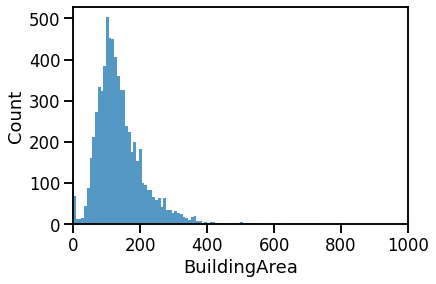

In [27]:
seaborn.histplot(knn_melb.BuildingArea)
plt.xlim(0,1000)

##### DataFrame con KNN

In [28]:
# Observamos las columnas imputadas: 

melb_data_mice_knn = melb_data_mice[['YearBuilt', 'BuildingArea']]
melb_data_mice_knn

# Vemos si quedaron celdas sin imputar: (NO!)
melb_data_mice_knn.isna().sum()

YearBuilt       0
BuildingArea    0
dtype: int64

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

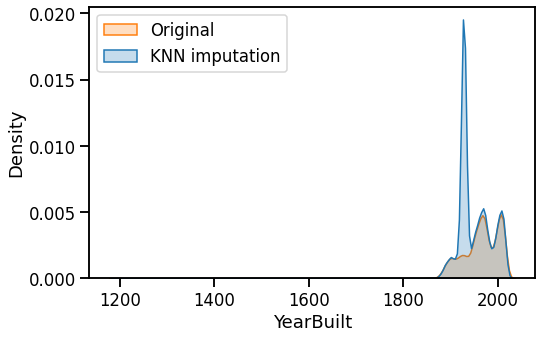

In [29]:
#En el siguiente grafico veremos la distribucion de datos de la columna Yearbuilt imputada por KNN y la original donde solo hemos descartados los NaNs. 

mice_year_built_knn = melb_data_mice.YearBuilt.to_frame()
mice_year_built_knn['Imputation'] = 'KNN over YearBuilt'

melb_year_built_org = knn_melb.YearBuilt.dropna().to_frame()
melb_year_built_org['Imputation'] = 'Original'

data = pd.concat([mice_year_built_knn, melb_year_built_org])

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation',fill=True,legend=False)

plt.legend(title='', loc='upper left', labels=['Original','KNN imputation'])



In [30]:
## Del grafico anterior podemos observar que son diferentes ambas curvas. La imputacion por KNN esta cambiando la distribucion de datos con respecto
## a la original. 

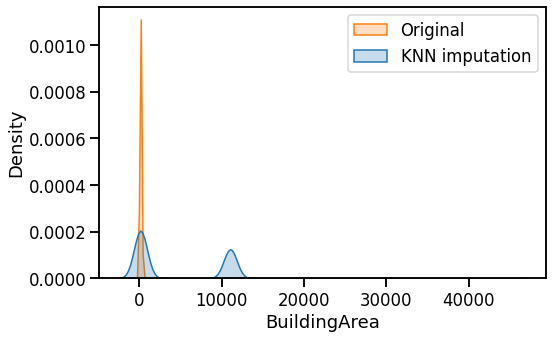

In [31]:
#Hacemos lo mismo con la columna Building Area

mice_building_area_knn = melb_data_mice.BuildingArea.to_frame()
mice_building_area_knn['Imputation'] = 'KNN over BuildingArea'

melb_building_area_org = knn_melb.BuildingArea.dropna().to_frame()
melb_building_area_org['Imputation'] = 'Original'

data2 = pd.concat([mice_building_area_knn, melb_building_area_org])

fig = plt.figure(figsize=(8, 5))

g = seaborn.kdeplot(data=data2, x='BuildingArea', hue='Imputation',fill=True,legend=False)

plt.legend(title='', loc='upper right', labels=['Original','KNN imputation'])



In [32]:
## Lo mismo observamos acá, la imputacion por KNN cambia notablemente la distribucion de datos con respecto a la original. 

Es por ello que probablemente, sea util escalar o normalizar los valores. Veremos eso, entonces:

### Escalado

In [33]:
from sklearn.preprocessing import RobustScaler

### Aplicamos Escalado para ver las diferencias en el resultado

YearBuilt_copy = knn_melb.YearBuilt.values.copy().reshape(-1,1)
YearBuilt_copy_scaled = RobustScaler().fit_transform(YearBuilt_copy)

BuildingArea_copy = knn_melb.BuildingArea.values.copy().reshape(-1,1)
BuildingArea_copy_scaled = RobustScaler().fit_transform(BuildingArea_copy)

melb_ok_scaled = knn_melb.copy(deep=True) #Nuevo df "original"
melb_ok_scaled['YearBuilt'] = YearBuilt_copy_scaled
melb_ok_scaled['BuildingArea'] = BuildingArea_copy_scaled

# Aplico la imputacion KNN a las columnas ya escaladas.
melb_data_mice_scaled = melb_ok_scaled.copy(deep=True)

mice_imputer_scaled = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(), max_iter=200)
melb_data_mice_scaled[['YearBuilt','BuildingArea']] = mice_imputer_scaled.fit_transform(melb_data_mice_scaled[['YearBuilt', 'BuildingArea']])
melb_data_mice_scaled[['YearBuilt','BuildingArea']].describe()

,YearBuilt,BuildingArea
count,13310.000000,13310.000000
mean,-0.502402,0.284817
std,0.725414,5.185049
min,-13.118644,-1.615385
25%,-1.186441,-0.137949
50%,-0.677966,0.202564
75%,0.084746,0.217949
max,0.813559,569.089744


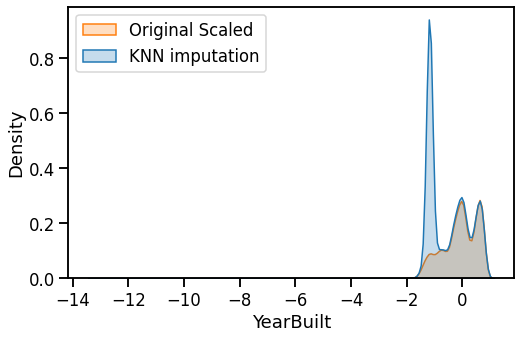

In [34]:
# Hago nuevamente las graficas: 
mice_year_built = melb_data_mice_scaled.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = melb_ok_scaled.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Scaled'

data = pd.concat([mice_year_built, melb_year_build])

fig = plt.figure(figsize=(8, 5))

g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation',fill=True,legend=False)

plt.legend(title='', loc='upper left', labels=['Original Scaled','KNN imputation'])


In [35]:
## Vemos que no ha cambiado mucho la gráfica con respecto a los datos sin escalar. 

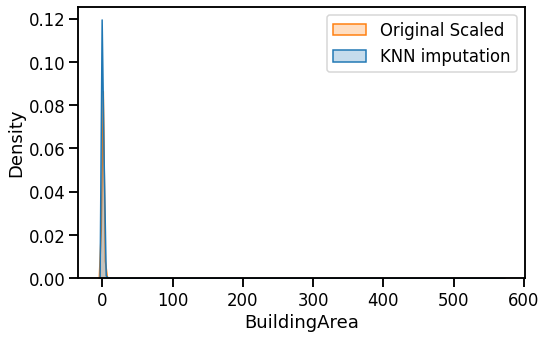

In [36]:
mice_building_area = melb_data_mice_scaled.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over BuildingArea'

melb_building_area = melb_ok_scaled.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Scaled'

data = pd.concat([mice_building_area, melb_building_area])

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation',fill=True ,legend=False)

plt.legend(title='', loc='upper right', labels=['Original Scaled','KNN imputation'])



(-20.0, 20.0)

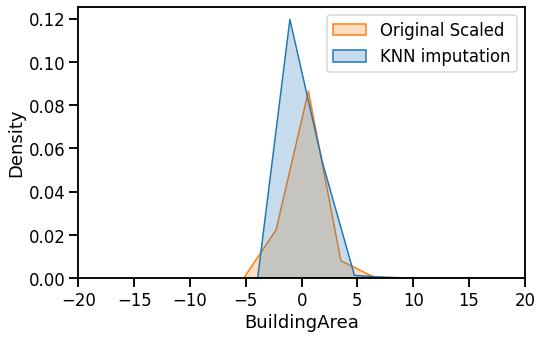

In [37]:
##Acá si vemos un notable cambio. Ambas distribuciones presentan mayores coincidencias. Lo podemos ver más detalladamente haciendo zoom:

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation',fill=True ,legend=False)

plt.legend(title='', loc='upper right', labels=['Original Scaled','KNN imputation'])

plt.xlim(-20,20)

#Vemos que el comportamiento de ambas distribuciones es similar. Escalar si ha servido para mejorar la imputacion en la columna Building Area. 

### Normalizacion de los datos

In [38]:
# Veamos ahora si normalizar nos ayuda a mejorar los resultados de imputacion en la columna YearBuilt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

## Eliminamos los NaN para poder aplicarla Normalizacion
melb_ok_copy = knn_melb.copy(deep=True)
melb_ok_copy['YearBuilt'] = np.where(melb_ok_copy['YearBuilt'].isna(),0,melb_ok_copy['YearBuilt'])
melb_ok_copy['BuildingArea'] = np.where(melb_ok_copy['BuildingArea'].isna(),0,melb_ok_copy['BuildingArea'])

### Aplicamos Normalizacion para ver las diferencias en el resultado
YearBuilt_copy = melb_ok_copy.YearBuilt.values.copy().reshape(-1,1)
YearBuilt_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(YearBuilt_copy)

BuildingArea_copy = melb_ok_copy.BuildingArea.values.copy().reshape(-1,1)
BuildingArea_copy_standard = Normalizer(norm='l2', copy=True).fit_transform(BuildingArea_copy)

melb_ok_standard = melb_ok_copy.copy(deep=True)
melb_ok_standard['YearBuilt'] = YearBuilt_copy_standard
melb_ok_standard['BuildingArea'] = BuildingArea_copy_standard

# Aplicamos ahora la imputacion por knn con las nuevas escalas.
melb_data_mice_standard = melb_ok_standard.copy(deep=True)

mice_imputer_standard = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(), max_iter=200)
melb_data_mice_standard[['YearBuilt','BuildingArea']] = mice_imputer_standard.fit_transform(melb_data_mice_standard[['YearBuilt', 'BuildingArea']])
melb_data_mice_standard[['YearBuilt','BuildingArea']].describe()

,YearBuilt,BuildingArea
count,13310.000000,13310.000000
mean,0.602479,0.522314
std,0.489404,0.499521
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


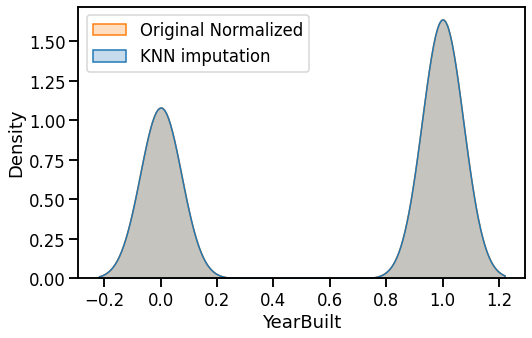

In [39]:
mice_year_built = melb_data_mice_standard.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = melb_ok_standard.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Normalized YearBuilt'

data = pd.concat([mice_year_built, melb_year_build])

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation',fill=True, legend=False)

plt.legend(title='', loc='upper left', labels=['Original Normalized','KNN imputation'])

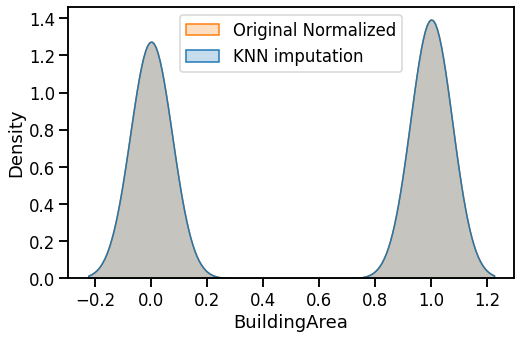

In [40]:
mice_building_area = melb_data_mice_standard.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over BuildingArea'

melb_building_area = melb_ok_standard.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Normalized BuildingArea'

data = pd.concat([mice_building_area, melb_building_area])

fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation',fill=True, legend=False)
plt.legend(title='', loc='upper center', labels=['Original Normalized','KNN imputation'])

In [41]:
##Vemos que normalizar mejora enormemente la distribucion de las columnas BuildingArea y YearBuilt luego de la imputacion por KNN.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

#### PCA
Se aplica PCA con datos escalados por que es recomendable estandarizar o al menos escalar la matriz original para asegurar de que todas las variables estén en las mismas unidades y ninguna tenga un peso demasiado grande


In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [43]:
print("Before PCA:", melb_data_mice_standard.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=min(20, melb_data_mice_standard.shape[1]))
pca.fit(melb_data_mice_standard)
pca_melb_data_mice_standard = pca.transform(melb_data_mice_standard)
print("After PCA", pca_melb_data_mice_standard.shape)

Before PCA: (13310, 69)
After PCA (13310, 20)


#### Gráficos de varianza

In [44]:
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[ 5.36806625e-07  3.71796062e-07 -1.76121631e-06 ...  4.48816743e-07
  -2.76947868e-08 -8.51385391e-09]
 [ 4.56229209e-04  1.67232965e-04  2.85632114e-02 ... -1.79116682e-04
   1.33053219e-05 -5.76430359e-05]
 [ 2.09875623e-03  5.50152592e-03  5.96152304e-02 ... -3.14889128e-02
  -2.99543091e-04  1.68756725e-06]
 ...
 [ 1.05444309e-02  6.10114285e-03 -1.61691430e-02 ... -8.80557823e-03
   7.12698035e-03 -1.52517147e-03]
 [ 2.95423894e-03 -8.48392607e-03 -6.07942333e-03 ... -3.09740633e-03
  -3.75695067e-04  7.20693471e-03]
 [-2.17183892e-03  8.08667735e-04  2.93721509e-04 ...  2.36978801e-03
   7.11052936e-03 -9.55197640e-03]]
Explained variance: 
[3.02125109e+11 8.25936030e+03 1.45461179e+03 2.20796763e+01
 2.09353516e+00 7.92933163e-01 4.54591105e-01 3.53292046e-01
 3.18642766e-01 2.51497087e-01 2.40589034e-01 1.73194438e-01
 1.24870691e-01 1.05214169e-01 1.02118390e-01 5.57288604e-02
 4.96751406e-02 3.22301535e-02 2.40301513e-02 1.77036044e-02]
Explained varian

##### Representación de los componentes principales

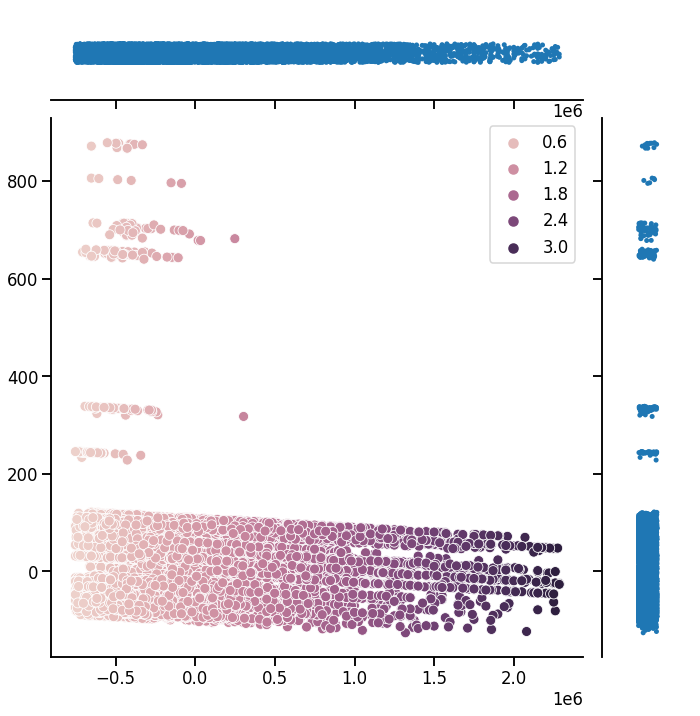

In [45]:
g = seaborn.JointGrid(x=pca_melb_data_mice_standard[:,0], y=pca_melb_data_mice_standard[:,1],
                      hue=knn_melb['Price'].values,
                      height=10)
g.plot_joint(seaborn.scatterplot, s=100)
g.plot_marginals(seaborn.stripplot)

#### DataFrame con PCA

In [46]:
# Volvemos al df previo a PCA (el df obtenido de la normalizacion) y le agregamos dos columnas con las dos primeras componentes principales:

melb_data_mice_standard[['pca1_normalized', 'pca2_normalized']]=pca_melb_data_mice_standard[:,:2]

melb_data_mice_standard[:1]

,Bathroom,Car,Distance,Lattitude,Longtitude,Postcode,Price,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Rooms_1,Rooms_2,Rooms_3 a 5,Rooms_Más de 6,Suburb_Ascot Vale,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Other,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_Williamstown,Suburb_Yarraville,Type_h,Type_t,Type_u,daily_rental_price,review_scores_location,YearBuilt,BuildingArea,pca1_normalized,pca2_normalized
0,1.0,1.0,2.5,-37.7996,144.9984,3067.0,1480000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,0.0,0.0,427866.498469,-45.14206


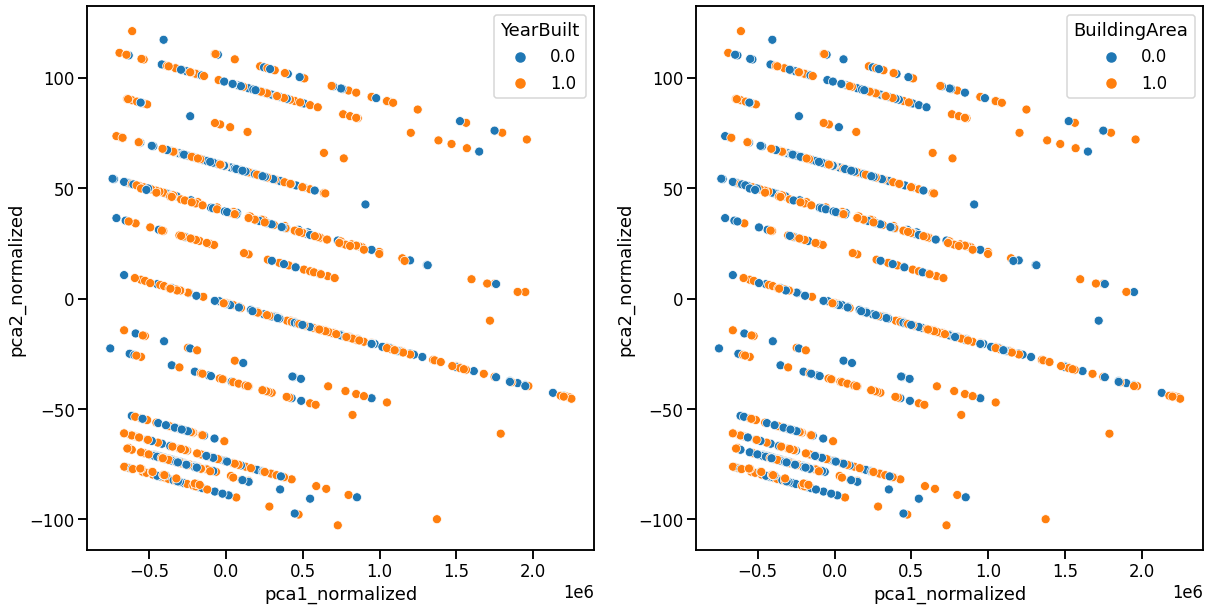

In [47]:
#Acá graficamos las primeras 1000 lineas de la componente principal 1 vs la 2 empleando como hue's las columnas normalizadas YearBuilt y BuildingArea. 

cols = ['YearBuilt', 'BuildingArea']
data = melb_data_mice_standard[cols + ['pca1_normalized', 'pca2_normalized']][:1000].dropna(how='any')
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
seaborn.scatterplot(data=data, x='pca1_normalized', y='pca2_normalized',
                    hue='YearBuilt', ax=axes[0])  
seaborn.scatterplot(data=data, x='pca1_normalized', y='pca2_normalized',
                    hue='BuildingArea', ax=axes[1])

In [48]:
## No parece haber correlacion con los valores normalizados de YearBuilt y BuildingArea. 

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pd.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

#### Composición del resultado

In [54]:
# Finalmente, hemos obtenido el DF "melb_data_mice_standard" donde las columnas numericas, siguen como tales; las categoricas (excepto BuildingArea 
# y YearBuilt) han sido codificadas de acuerdo con el metodo One-Hot Encoder (o DictVectorizer, ya vimos que el resultado era el mismo) y a partir 
# de ello, han aparecido nuevas columnas cada una asociada a cada opcion de cada categoria. Las categorias BuildingArea y YearBuilt fueron 
# normalizadas. Por ultimo, se agregaron a las columnas las dos primeras componentes principales obtenidas de PCA.  

#Detalle de las nuevas columnas:

print('Columnas del DF final:',melb_data_mice_standard.columns)

#En cuanto a las dimensiones, vemos que el numero de filas se ha mantenido con respecto al DF original y que el numero de columnas finales es 71. 

print('Dimensiones del DF final:',melb_data_mice_standard.shape)


melb_data_mice_standard.head()


Columnas del DF final: Index(['Bathroom', 'Car', 'Distance', 'Lattitude', 'Longtitude', 'Postcode',
       'Price', 'Regionname_Eastern Metropolitan',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'Rooms_1', 'Rooms_2', 'Rooms_3 a 5',
       'Rooms_Más de 6', 'Suburb_Ascot Vale', 'Suburb_Balwyn',
       'Suburb_Balwyn North', 'Suburb_Bentleigh', 'Suburb_Bentleigh East',
       'Suburb_Brighton', 'Suburb_Brighton East', 'Suburb_Brunswick',
       'Suburb_Brunswick West', 'Suburb_Camberwell', 'Suburb_Carnegie',
       'Suburb_Coburg', 'Suburb_Doncaster', 'Suburb_Elwood', 'Suburb_Essendon',
       'Suburb_Fawkner', 'Suburb_Footscray', 'Suburb_Glen Iris',
       'Suburb_Glenroy', 'Suburb_Hampton', 'Suburb_Hawthorn',
       'Suburb_Hawthorn East', 'Suburb_Keilor East', 'S

,Bathroom,Car,Distance,Lattitude,Longtitude,Postcode,Price,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Rooms_1,Rooms_2,Rooms_3 a 5,Rooms_Más de 6,Suburb_Ascot Vale,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bentleigh,Suburb_Bentleigh East,Suburb_Brighton,Suburb_Brighton East,Suburb_Brunswick,Suburb_Brunswick West,Suburb_Camberwell,Suburb_Carnegie,Suburb_Coburg,Suburb_Doncaster,Suburb_Elwood,Suburb_Essendon,Suburb_Fawkner,Suburb_Footscray,Suburb_Glen Iris,Suburb_Glenroy,Suburb_Hampton,Suburb_Hawthorn,Suburb_Hawthorn East,Suburb_Keilor East,Suburb_Kensington,Suburb_Kew,Suburb_Malvern East,Suburb_Moonee Ponds,Suburb_Newport,Suburb_Northcote,Suburb_Other,Suburb_Pascoe Vale,Suburb_Port Melbourne,Suburb_Prahran,Suburb_Preston,Suburb_Reservoir,Suburb_Richmond,Suburb_South Yarra,Suburb_St Kilda,Suburb_Sunshine,Suburb_Surrey Hills,Suburb_Thornbury,Suburb_Williamstown,Suburb_Yarraville,Type_h,Type_t,Type_u,daily_rental_price,review_scores_location,YearBuilt,BuildingArea,pca1_normalized,pca2_normalized
0,1.0,1.0,2.5,-37.7996,144.9984,3067.0,1480000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,0.0,0.0,427866.498469,-45.142060
1,1.0,0.0,2.5,-37.8079,144.9934,3067.0,1035000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,1.0,1.0,-17133.501360,-36.639254
2,2.0,0.0,2.5,-37.8093,144.9944,3067.0,1465000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,1.0,1.0,412866.498476,-44.855458
3,2.0,1.0,2.5,-37.7969,144.9969,3067.0,850000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,0.0,0.0,-202133.501288,-33.103889
4,1.0,2.0,2.5,-37.8072,144.9941,3067.0,1600000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,127.63035,9.695652,1.0,1.0,547866.498424,-47.435148


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
